# Second Exploration: In-Depth Dataset Analysis

In this notebook, our goal is to conduct a deeper exploration of the variables in our dataset, in order to better understand their relationship with the dependent variable **Churn**.

## Objectives:
- Analyze the distributions of the variables in detail.
- Investigate possible correlations between the independent variables and **Churn**.
- Identify patterns or trends that may influence the likelihood of a customer churning.

This advanced exploration will give us a clearer view of which factors most directly affect **Churn**, providing the foundation for future feature selection and predictive model building.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run ../telco_customer_churn/utils/pandas_explorer.py

## Dataset Load and First Visualization:

In [2]:
path = '../telco_customer_churn/data/cleaned_dataset.csv'
df = pd.read_csv(path)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Bivariate Analysis:

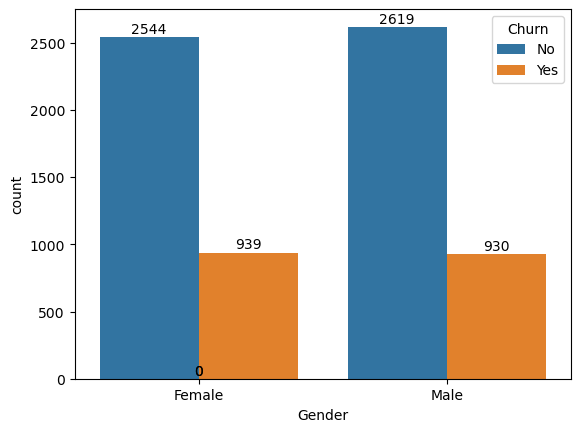

   Gender  Total Churn  Count      %
0    Male   3549    No   2619  73.80
1  Female   3483    No   2544  73.04
2  Female   3483   Yes    939  26.96
3    Male   3549   Yes    930  26.20


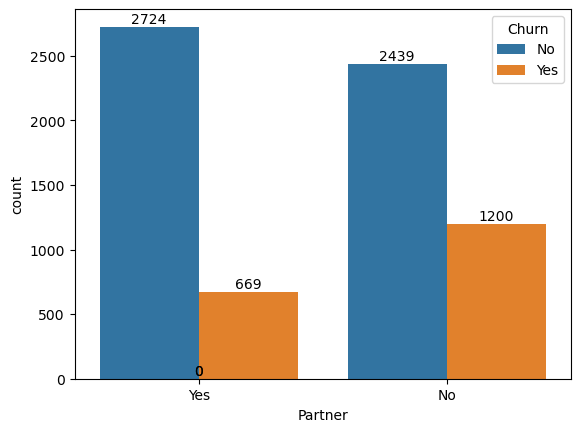

  Partner  Total Churn  Count      %
0     Yes   3393    No   2724  80.28
1      No   3639    No   2439  67.02
2      No   3639   Yes   1200  32.98
3     Yes   3393   Yes    669  19.72


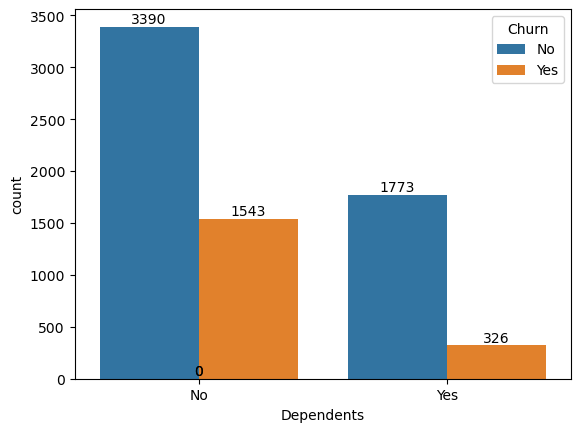

  Dependents  Total Churn  Count      %
0         No   4933    No   3390  68.72
1        Yes   2099    No   1773  84.47
2         No   4933   Yes   1543  31.28
3        Yes   2099   Yes    326  15.53


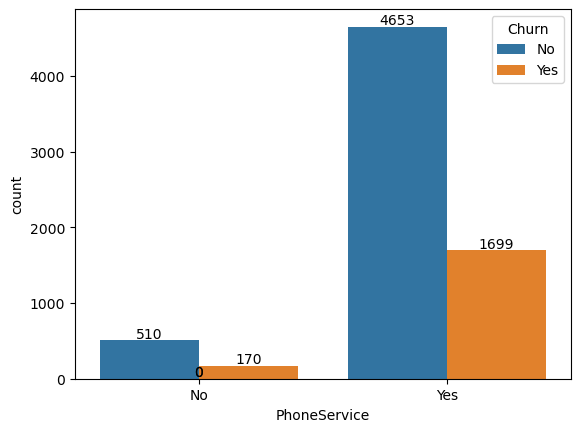

  PhoneService  Total Churn  Count      %
0          Yes   6352    No   4653  73.25
1          Yes   6352   Yes   1699  26.75
2           No    680    No    510  75.00
3           No    680   Yes    170  25.00


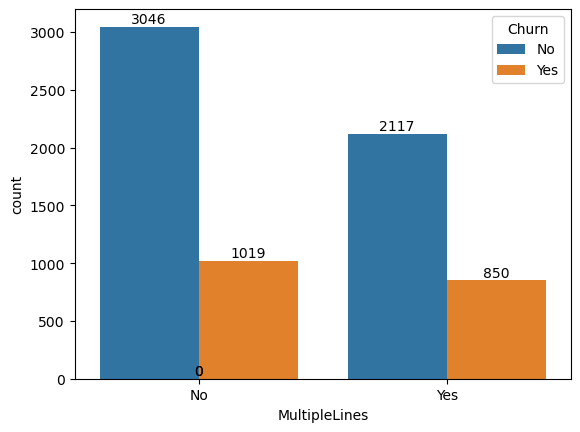

  MultipleLines  Total Churn  Count      %
0            No   4065    No   3046  74.93
1           Yes   2967    No   2117  71.35
2            No   4065   Yes   1019  25.07
3           Yes   2967   Yes    850  28.65


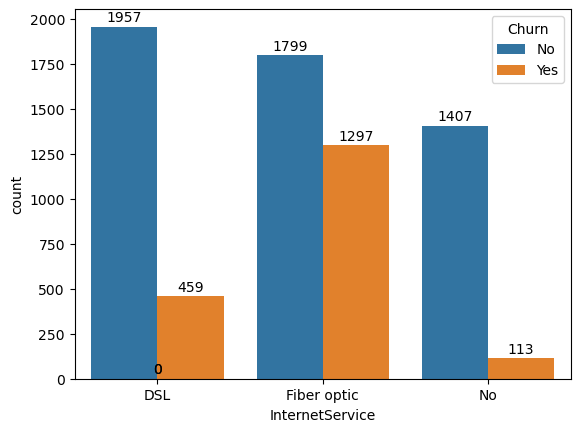

  InternetService  Total Churn  Count      %
0             DSL   2416    No   1957  81.00
1     Fiber optic   3096    No   1799  58.11
2              No   1520    No   1407  92.57
3     Fiber optic   3096   Yes   1297  41.89
4             DSL   2416   Yes    459  19.00
5              No   1520   Yes    113   7.43


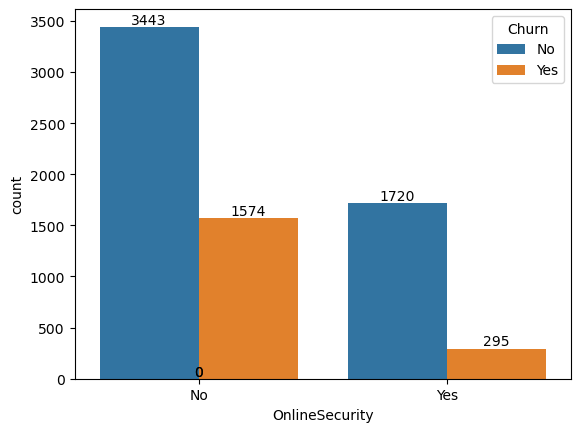

  OnlineSecurity  Total Churn  Count      %
0             No   5017    No   3443  68.63
1            Yes   2015    No   1720  85.36
2             No   5017   Yes   1574  31.37
3            Yes   2015   Yes    295  14.64


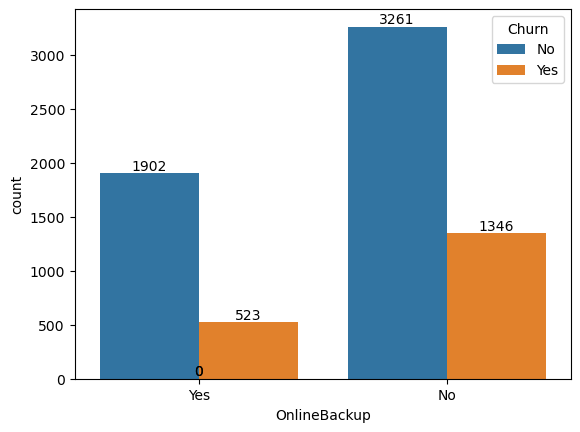

  OnlineBackup  Total Churn  Count      %
0           No   4607    No   3261  70.78
1          Yes   2425    No   1902  78.43
2           No   4607   Yes   1346  29.22
3          Yes   2425   Yes    523  21.57


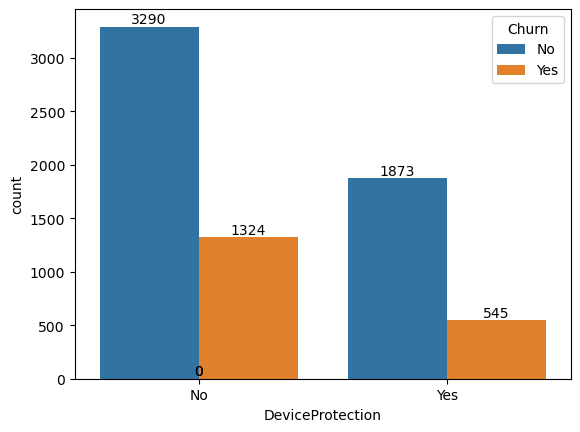

  DeviceProtection  Total Churn  Count      %
0               No   4614    No   3290  71.30
1              Yes   2418    No   1873  77.46
2               No   4614   Yes   1324  28.70
3              Yes   2418   Yes    545  22.54


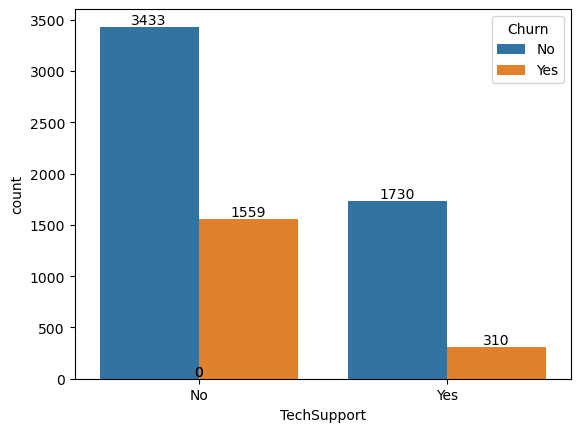

  TechSupport  Total Churn  Count      %
0          No   4992    No   3433  68.77
1         Yes   2040    No   1730  84.80
2          No   4992   Yes   1559  31.23
3         Yes   2040   Yes    310  15.20


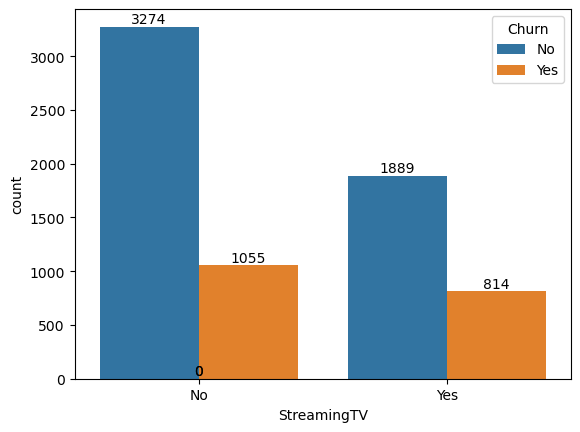

  StreamingTV  Total Churn  Count      %
0          No   4329    No   3274  75.63
1         Yes   2703    No   1889  69.89
2          No   4329   Yes   1055  24.37
3         Yes   2703   Yes    814  30.11


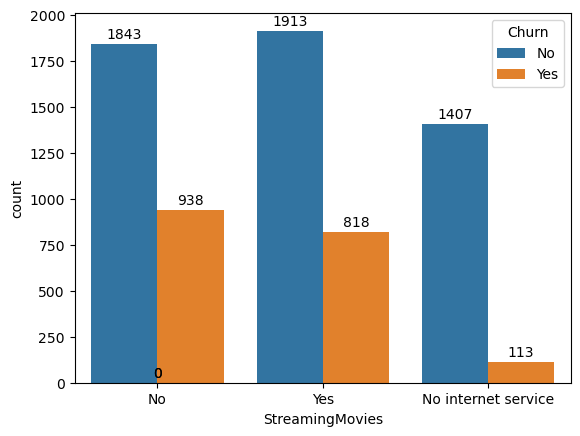

       StreamingMovies  Total Churn  Count      %
0                  Yes   2731    No   1913  70.05
1                   No   2781    No   1843  66.27
2  No internet service   1520    No   1407  92.57
3                   No   2781   Yes    938  33.73
4                  Yes   2731   Yes    818  29.95
5  No internet service   1520   Yes    113   7.43


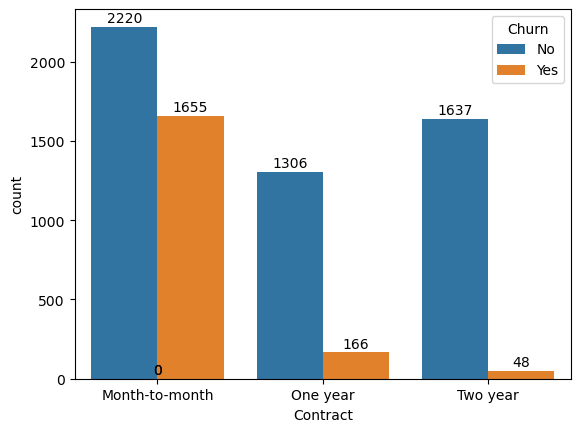

         Contract  Total Churn  Count      %
0  Month-to-month   3875    No   2220  57.29
1  Month-to-month   3875   Yes   1655  42.71
2        Two year   1685    No   1637  97.15
3        One year   1472    No   1306  88.72
4        One year   1472   Yes    166  11.28
5        Two year   1685   Yes     48   2.85


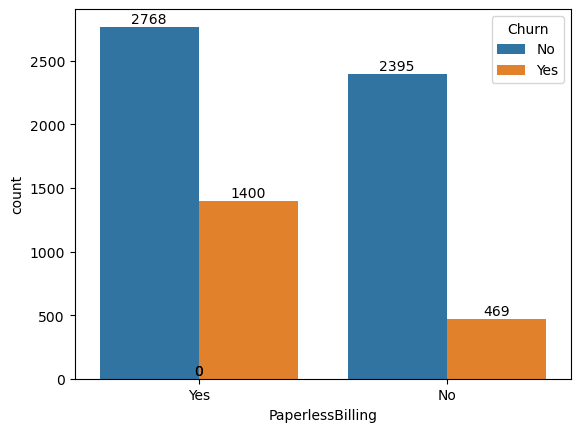

  PaperlessBilling  Total Churn  Count      %
0              Yes   4168    No   2768  66.41
1               No   2864    No   2395  83.62
2              Yes   4168   Yes   1400  33.59
3               No   2864   Yes    469  16.38


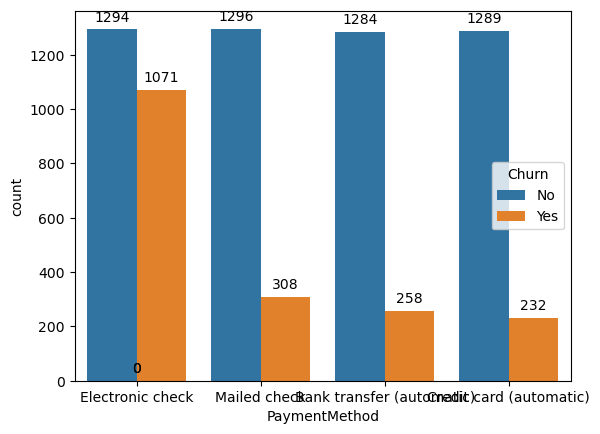

               PaymentMethod  Total Churn  Count      %
0               Mailed check   1604    No   1296  80.80
1           Electronic check   2365    No   1294  54.71
2    Credit card (automatic)   1521    No   1289  84.75
3  Bank transfer (automatic)   1542    No   1284  83.27
4           Electronic check   2365   Yes   1071  45.29
5               Mailed check   1604   Yes    308  19.20
6  Bank transfer (automatic)   1542   Yes    258  16.73
7    Credit card (automatic)   1521   Yes    232  15.25


In [3]:
filter_ = (df.dtypes == 'object') & (df.columns != 'Churn')
cols = list(df.columns[filter_])
for col in cols:
    df.explorer.countplot_hue(col,'Churn')
    print(df.explorer.percentage_table(col,'Churn'))

### Churn:

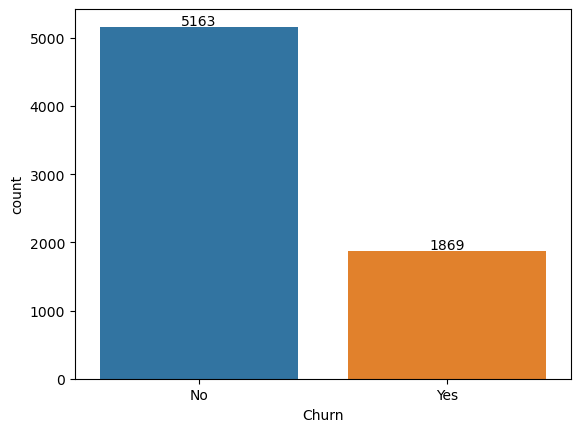

,Churn,Count,%
0,No,5163,73.42
1,Yes,1869,26.58


In [4]:
df.explorer.countplot_hue('Churn','Churn')
churn_count = df["Churn"].value_counts()
percentage_table = pd.DataFrame({
    'Churn':churn_count.index,
    'Count':churn_count.values})
percentage_table['%'] = round(percentage_table.Count / percentage_table.Count.sum() * 100,2)
percentage_table

## Mutivariate Analysis:

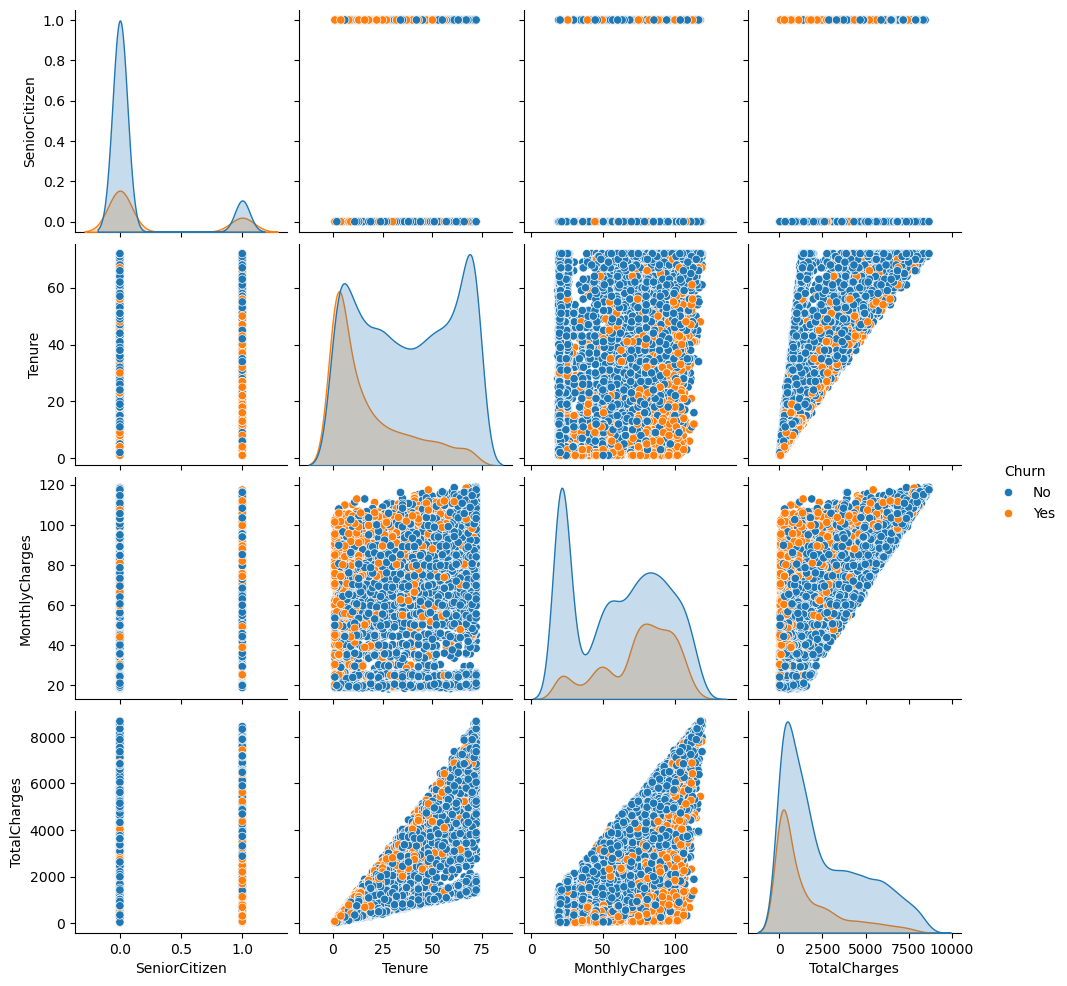

In [5]:
sns.pairplot(
    data=df,
    hue='Churn'
)
plt.show()

## "Tenure" Vs "MonthlyCharges":

The Pearson Correlation Index Is: 0.247


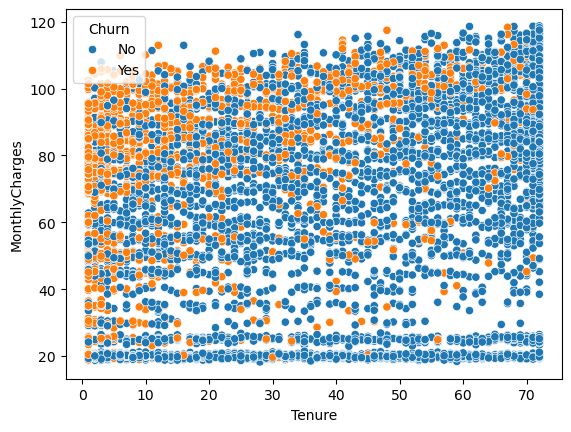

In [6]:
df.explorer.scatter_corr('Tenure','MonthlyCharges','Churn')

### Correlation Analysis

- **Pearson Correlation Coefficient:** The correlation coefficient between `Tenure` and `MonthlyCharges` is **0.248**.
  - This value indicates a **weak positive correlation**. As the tenure increases, monthly charges tend to increase, although the relationship is not very strong.

- **Scatter Plot:**
  - The plot shows that the **highest concentration of customers who churn** are those with **high monthly charges** and **short tenure** as customers. This suggests that new customers facing higher costs are more likely to abandon the service.




## MonthlyCharges Vs TotalCharges

The Pearson Correlation Index Is: 0.651


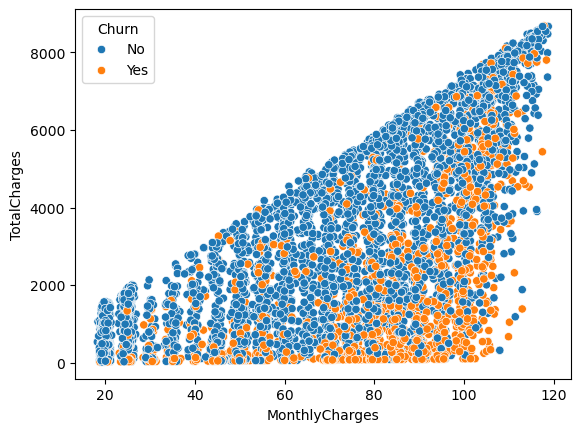

In [7]:
df.explorer.scatter_corr('MonthlyCharges','TotalCharges','Churn')

- Correlation between MonthlyCharges and TotalCharges: The Pearson correlation coefficient between these two variables is 0.651. This indicates a moderate positive correlation, meaning that as monthly charges increase, total charges also tend to increase, though not perfectly.

#### Scatterplot Analysis:

- The scatterplot reveals a higher concentration of customers who churn in the lower-left section of the graph.
- This area represents customers with high monthly charges but low total charges, which suggests that they are new customers who are paying high fees but have not been with the service long enough to accumulate substantial total charges.
### Interpretation:

- These findings imply that new customers with high monthly charges are more likely to churn.
- The high cost relative to the short tenure may lead to dissatisfaction, causing them to leave the service before accumulating higher total charges.
- Understanding that high monthly and total charges appear to be closely related to churn, we will conduct an analysis to see how each categorical variable relates to the generation of charges.






# Conclusions from Churn Analysis

After conducting a detailed exploration of the variables in our dataset and their impact on **Churn**, we can extract the following conclusions:

### 1. Gender
- The churn rate is very similar between males and females. **26.92%** of women and **26.16%** of men have canceled their service, indicating that gender does not seem to be a determining factor in service cancellation.

### 2. Senior Citizen
- Senior citizens have a significantly higher churn rate (**41.68%**) compared to non-seniors (**23.61%**). This suggests that being an older customer is associated with a higher likelihood of service cancellation.

### 3. Partner Status
- Customers without a partner show a higher churn rate (**32.96%**) compared to those with a partner (**19.66%**). This may relate to economic factors or family stability.

### 4. Dependents
- Customers without dependents exhibit a higher churn rate (**31.28%**) compared to those with dependents (**15.45%**). This may indicate that customers with dependents tend to be more stable and less likely to cancel the service.

### 5. Phone Service
- Both customers with (**26.71%**) and without phone service (**24.93%**) show similar churn rates. Therefore, phone service does not appear to be a key factor in cancellation decisions.

### 6. Multiple Lines
- Customers with multiple lines have a slightly higher churn rate (**28.61%**) than those with a single line (**25.02%**). However, the diference is very small, therefore, Multiple Lines does not appear to be a key factor in cancellation decisions.

### 7. Internet Service
- Customers with **Fiber optic** have a significantly higher churn rate (**41.89%**) compared to those with **DSL** (**18.96%**) or no internet service (**7.40%**). This suggests that fiber optic service may be associated with customer satisfaction issues that drive cancellations.

### 8. Online Security
- Customers without online security services have a higher churn rate (**31.33%**) compared to those with the service (**14.61%**). This indicates that having online security reduces the likelihood of customers canceling their service.

### 9. Online Backup
- Customers without online backup services have a higher churn rate (**29.17%**) compared to those who do have this service (**21.53%**). This suggests that additional backup services contribute to customer retention.

### 10. Device Protection
- Similar to other additional services, customers without device protection have a higher churn rate (**28.65%**) compared to those with this service (**22.50%**).

### 11. Tech Support
- Customers without tech support have a churn rate of **31.19%**, while those with tech support have a rate of only **15.17%**. This emphasizes the importance of providing good tech support for customer retention.

### 12. Contract Type
- Month-to-month customers have a high churn rate (**42.71%**), while those with one or two-year contracts have much lower rates (**11.27%** and **2.83%**, respectively). This suggests that long-term contracts are strongly associated with customer retention.

### 13. Paperless Billing
- Customers opting for paperless billing show a higher churn rate (**33.57%**) compared to those not using paperless billing (**16.33%**). This could relate to ease of cancellation for customers using electronic billing.

### 14. Payment Method
- Customers using **electronic checks** have the highest churn rate (**45.29%**), while those paying by **automatic bank transfer** (**16.71%**) or **automatic credit card** (**15.24%**) have much lower churn rates. This suggests that automatic payment methods contribute to customer retention.

### Correlation Analysis

- **Pearson Correlation Coefficient:** 
  - The correlation coefficient between `Tenure` and `MonthlyCharges` is **0.248**.This value indicates a **weak positive correlation**. As tenure increases, monthly charges tend to increase, although the relationship is not very strong.
  - The Pearson correlation coefficient between `MonthlyCharges` and `TotalCharges` is **0.651**, indicating a moderate positive correlation. This means that as monthly charges increase, total charges also tend to increase, though not perfectly.


- **Scatter Plot:**
  - The plot shows that the **highest concentration of customers who churn** are those with **high monthly charges** and **short tenure** as customers. This suggests that new customers facing higher costs are more likely to abandon the service.

  - The scatterplot between **MonthlyCharges** vs **TotalCharges** reveals a higher concentration of customers who churn in the lower-left section of the graph. This area represents customers with high monthly charges but low total charges, suggesting that they are new customers paying high fees but have not been with the service long enough to accumulate substantial total charges.

### Interpretation:

- These findings imply that new customers with high monthly charges are more likely to churn.
- The high cost relative to the short tenure may lead to dissatisfaction, causing them to leave the service before accumulating higher total charges.
- Understanding that high monthly and total charges appear to be closely related to churn.

### Overall Conclusion:
Factors such as contract type, age (being a senior citizen), the absence of additional services (online security, backup, tech support), and payment method play significant roles in churn rates. The analysis suggests that the company could focus on promoting long-term contracts and additional services to reduce churn.


##